# Optimization of Support Vector Machines
---
Author: Dorian Boucher
contact: [boucherd@postech.ac.kr](mailto:boucherd@postech.ac.kr)


## 1. Import of the dataset

In this project, the dataset that will be used is the [Pima Indians Diabetes Database](https://www.kaggle.com/uciml/pima-indians-diabetes-database), consisting of diagnostic measurements from 768 female patients of Pima Indian heritage.


### 1.1. Data preparation

In [6]:
import pandas as pd
data = pd.read_csv('data/pima_indians.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Converting the dataframe to features $X$ where $X_i \in \mathbb{R}^{8}$ and target $y$ where $y_i \in \{-1;1\} \text{ } \forall i=1,\dots,768$

In [7]:
X = ((data.iloc[:,:-1] - data.iloc[:,:-1].mean())/data.iloc[:,:-1].std()).values
X

array([[ 0.63953049,  0.84777132,  0.1495433 , ...,  0.20387991,
         0.46818687,  1.42506672],
       [-0.84433482, -1.12266474, -0.16044119, ..., -0.68397621,
        -0.36482303, -0.19054773],
       [ 1.23307662,  1.94245802, -0.26376935, ..., -1.10253696,
         0.6040037 , -0.10551539],
       ...,
       [ 0.34275743,  0.00329872,  0.1495433 , ..., -0.73471085,
        -0.68474712, -0.27558007],
       [-0.84433482,  0.15968254, -0.47042568, ..., -0.24004815,
        -0.37085933,  1.1699697 ],
       [-0.84433482, -0.87245064,  0.04621514, ..., -0.20199718,
        -0.4734765 , -0.87080644]])

In [8]:
y = data.iloc[:,-1].values
y[y==0] = -1
y

array([ 1, -1,  1, -1,  1, -1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,
        1, -1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1,  1, -1, -1,
       -1, -1, -1,  1,  1,  1, -1, -1, -1,  1, -1,  1, -1, -1,  1, -1, -1,
       -1, -1,  1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1,  1, -1,  1, -1,
       -1, -1,  1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1, -1, -1,
       -1,  1, -1, -1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1,  1,  1, -1, -1, -1,  1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1,
        1,  1, -1, -1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1, -1,  1,  1,
        1,  1,  1, -1, -1,  1,  1, -1,  1, -1,  1,  1,  1, -1, -1, -1, -1,
       -1, -1,  1,  1, -1,  1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1, -1, -1, -1, -1

## 1.2. Visualization of the dataset with PCA

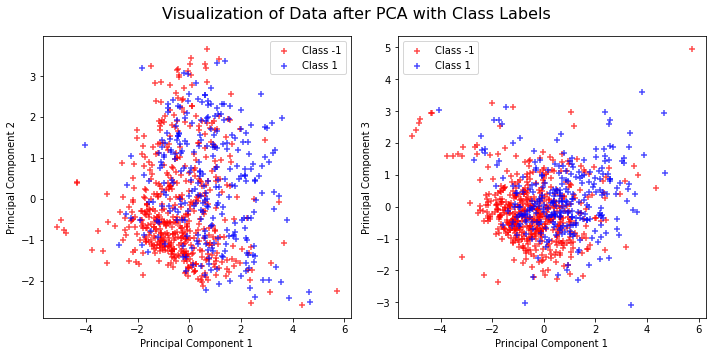

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

fig, axs = plt.subplots(ncols=2, figsize=(10, 5))  # Increase figsize for better visualization

# Add overall title to the figure
fig.suptitle('Visualization of Data after PCA with Class Labels', fontsize=16)

for i in range(2):
    # Remove individual subplot titles
    axs[i].set_title('')

    # Add labels
    axs[i].set_xlabel('Principal Component 1')
    axs[i].set_ylabel(f'Principal Component {i+2}')

    # Scatter plot with different colors for different classes
    axs[i].scatter(X_pca[y == -1, 0], X_pca[y == -1, i+1], color='red', alpha=0.7, marker="+", label='Class -1')
    axs[i].scatter(X_pca[y == 1, 0], X_pca[y == 1, i+1], color='blue', alpha=0.7, marker="+", label='Class 1')

    # Add legend for class labels
    axs[i].legend()

fig.tight_layout()
plt.savefig('results/dataset.png')
plt.show()

## 2. Initialization of the SVM

In [10]:
import numpy as np
from tqdm import tqdm

class SVM:
    def __init__(self, C=1.0, max_iter=1000, eta0=1, decay=0.01):
        self.C = C
        self.max_iter = max_iter
        self.eta0 = eta0
        self.decay = decay
        self.accuracy_history = []
        self.subgradient_losses = []
        self.proximal_gradient_losses = []
        self.fista_losses = []
        self.sgd_losses = []


    def compute_loss(self, X, y):
        distances = 1 - y*(X@self.w + self.b)
        distances[distances < 0] = 0
        hinge_loss = self.C * np.sum(distances)

        return 1/2 * self.w @ self.w + hinge_loss


    def compute_accuracy(self, X, y):
        predictions = np.sign(X @ self.w + self.b)
        accuracy = np.mean(predictions == y)
        return accuracy


    def plot_loss_and_accuracy(self, loss_history, accuracy_history, algo_name):
        plt.figure(figsize=(12, 5))

        # Plot for loss
        plt.subplot(1, 2, 1)
        plt.plot(loss_history, label='Loss')
        plt.title(f'SVM Loss Over Iterations for {algo_name}')
        plt.xlabel('Iteration')
        plt.ylabel('Loss')
        plt.legend()

        # Plot for accuracy
        plt.subplot(1, 2, 2)
        plt.plot(accuracy_history, label='Accuracy', color='green')
        plt.title(f'SVM Accuracy Over Iterations for {algo_name}')
        plt.xlabel('Iteration')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.tight_layout()
        plt.savefig(f'results/{algo_name}.png')
        plt.show()


    def fit_subgradient_method(self, X, y):
        n_samples, n_features = X.shape

        self.w = np.zeros(n_features)
        self.b = 0

        for t in tqdm(range(1, self.max_iter + 1)):
            # Decreasing step size
            eta_t = self.eta0 / (1 + self.decay * t)

            # Compute subgradient
            for i in range(n_samples):
                if y[i] * (np.dot(X[i], self.w) + self.b) < 1:
                    self.w -= eta_t * (2 * self.C * self.w - y[i] * X[i])
                    self.b -= eta_t * (-y[i])
                else:
                    self.w -= eta_t * (2 * self.C * self.w)
            self.subgradient_losses.append(self.compute_loss(X, y))
            self.accuracy_history.append(self.compute_accuracy(X,y))


    def fit_proximal_gradient_method(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for t in tqdm(range(1, self.max_iter + 1)):
            eta_t = self.eta0 / (1 + self.decay * t)

            # Gradient Descent Step for the regularization term
            self.w -= eta_t * (self.C * self.w)

            # Proximal Operator Step for the hinge loss
            for i in range(n_samples):
                if y[i] * (np.dot(X[i], self.w) + self.b) < 1:
                    self.w += eta_t * self.C * y[i] * X[i]
                    self.b += eta_t * self.C * y[i]

            self.proximal_gradient_losses.append(self.compute_loss(X, y))
            self.accuracy_history.append(self.compute_accuracy(X,y))


    def fit_fista(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        w_old = np.zeros(n_features)
        self.b = 0
        self.fista_losses = []
        t = 1

        for i in tqdm(range(1, self.max_iter + 1)):
            w_temp = self.w.copy()
            eta_t = self.eta0 / (1 + self.decay * i)

            # Gradient step for the smooth part (L2-norm regularization)
            self.w -= eta_t * self.w

            # Compute the subgradient of the hinge loss for all samples
            subgradient = np.zeros(n_features)
            for j in range(n_samples):
                if y[j] * (np.dot(X[j], self.w) + self.b) < 1:
                    subgradient += y[j] * X[j]

            # Apply the gradient and subgradient update
            self.w += eta_t * self.C * subgradient

            # Update the bias term
            subgradient_b = self.C * np.sum(y[np.where(y * (X @ self.w + self.b) < 1)])
            self.b += eta_t * subgradient_b

            # Acceleration step
            t_new = (1 + np.sqrt(1 + 4 * t**2)) / 2
            self.w = w_temp + ((t - 1) / t_new) * (self.w - w_old)
            t = t_new
            w_old = w_temp

            self.fista_losses.append(self.compute_loss(X, y))
            self.accuracy_history.append(self.compute_accuracy(X,y))


    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)

## 3. Training of the SVM

### 3.1. Separation of the data into training and test set

In [11]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3.2. Training of the SVM with Subgradient Method

In [12]:
svm = SVM(C=1.0, max_iter=10000, eta0=0.01, decay=0.001)

In [13]:
svm.fit_subgradient_method(X_train, y_train)

100%|██████████| 10000/10000 [01:10<00:00, 142.13it/s]


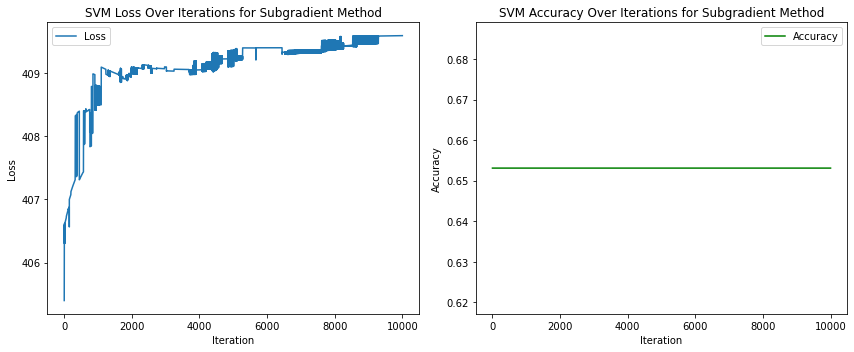

Last training loss:  409.58583507680225
Last accuracy:  0.6530944625407166


In [14]:
svm.plot_loss_and_accuracy(svm.subgradient_losses, svm.accuracy_history, "Subgradient Method")
print("Last training loss: ", svm.subgradient_losses[-1])
print("Last accuracy: ", svm.accuracy_history[-1])

In [15]:
# Evaluate the model on the testing set
predictions = svm.predict(X_test)
accuracy = np.mean(predictions == y_test)
print(f"Model accuracy: {accuracy * 100:.2f}%")

Model accuracy: 64.29%


### 3.3. Training of the SVM swith Proximal Gradient Descent

In [16]:
svm = SVM(C=1.0, max_iter=10000, eta0=0.01, decay=0.001)
svm.fit_proximal_gradient_method(X_train, y_train)

100%|██████████| 10000/10000 [00:52<00:00, 191.15it/s]


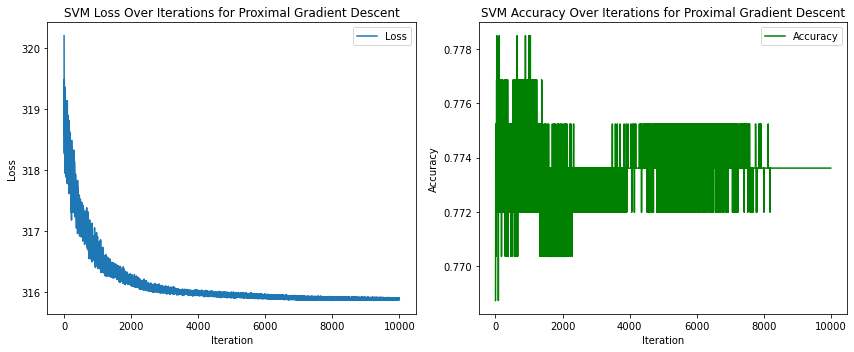

Last training loss:  315.8938324406004
Last accuracy:  0.7736156351791531


In [17]:
svm.plot_loss_and_accuracy(svm.proximal_gradient_losses, svm.accuracy_history, "Proximal Gradient Descent")
print("Last training loss: ", svm.proximal_gradient_losses[-1])
print("Last accuracy: ", svm.accuracy_history[-1])

In [18]:
# Evaluate the model on the testing set
predictions = svm.predict(X_test)
accuracy = np.mean(predictions == y_test)
print(f"Model accuracy: {accuracy * 100:.2f}%")

Model accuracy: 75.97%


### 3.4. Training of the SVM with FISTA

In [19]:
svm = SVM(C=1.0, max_iter=10000, eta0=0.01, decay=0.001)
svm.fit_fista(X_train, y_train)

100%|██████████| 10000/10000 [00:38<00:00, 262.85it/s]


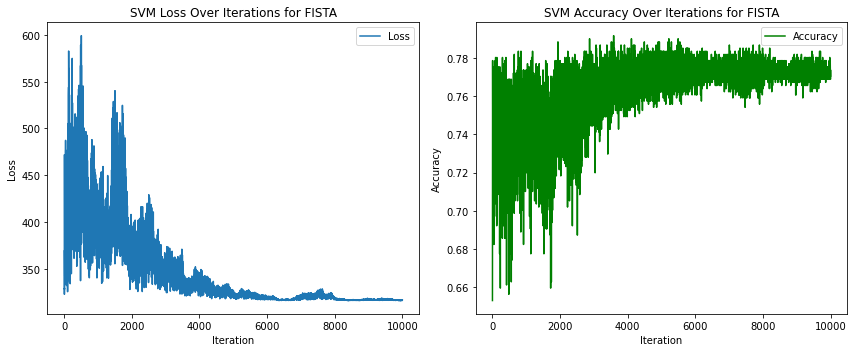

Last training loss:  316.35618840580145
Last accuracy:  0.7703583061889251


In [20]:
svm.plot_loss_and_accuracy(svm.fista_losses, svm.accuracy_history, "FISTA")
print("Last training loss: ", svm.fista_losses[-1])
print("Last accuracy: ", svm.accuracy_history[-1])

In [21]:
# Evaluate the model
predictions = svm.predict(X_test)
accuracy = np.mean(predictions == y_test)
print(f"Model accuracy: {accuracy * 100:.2f}%")

Model accuracy: 76.62%
